## Mortgage Modeler 

*ALL VALUES ARE ESTIMATES*

Updated 4/27/20

### Estimate upfront cost and total monthly mortgage to buy home.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Mortgage Inputs
mortgage_loan = 400000.0
mortgage_rate = 0.0325
mortgage_term = 30 * 12

# Upfront buying cost estimate
closing_cost_percent = 0.025
earnest_percent = 0.01
current_monthly_payment = 2500

print(f"Closing Cost: {mortgage_loan*closing_cost_percent:.2f}, Earnest Money: {mortgage_loan*earnest_percent:.2f}")

Closing Cost: 10000.00, Earnest Money: 4000.00


In [6]:
# Escrow Inputs
tax_2019 = 9000 / 12
hoa = 50 
home_insurance = 1500 / 12

print(f"2019 Tax: {tax_2019:.2f}, HOA: {hoa:.2f}, Home Insurance: {home_insurance:.2f}")

2019 Tax: 750.00, HOA: 50.00, Home Insurance: 125.00


In [7]:
# Calculate monthly mortgage payment
mortgage_rate_periodic = (1+mortgage_rate)**(1/12) - 1
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_term, mortgage_loan)

print(f"Monthly Mortgage Rate: {mortgage_rate_periodic:.4f}, Monthly Mortgage Payment: {periodic_mortgage_payment:.2f}")

Monthly Mortgage Rate: 0.0027, Monthly Mortgage Payment: 1730.43


In [8]:
# Estimate total monthly payment
total_monthly_payment = periodic_mortgage_payment + hoa + tax_2019 + home_insurance
print(f"Total Monthly Payment: {total_monthly_payment:.2f}, Current Monthly Payment: {current_monthly_payment:.2f}, Difference: {total_monthly_payment-current_monthly_payment:.2f}")

Total Monthly Payment: 2655.43, Current Monthly Payment: 2500.00, Difference: 155.43


### Estimate profit and upfront cost to sell home.

In [9]:
# Home sale inputs
home_price = 360000.00
mortgage_remainder = 320000

moving = 2000.00
title = 1000.00
repairs = 5000.00

In [10]:
# Estimate total sale profit and cost
profit = home_price - mortgage_remainder

realtor_commision = 0.06 * home_price
additional_cost = moving + title + repairs

total_cost = realtor_commision + additional_cost

print(f"Realtor commission: {realtor_commision:.2f}, Additional cost: {additional_cost:.2f}")
print(f"Profit: {profit:.2f}, Total sale cost: {total_cost:.2f}, Difference: {profit-total_cost:.2f}")

Realtor commission: 21600.00, Additional cost: 8000.00
Profit: 40000.00, Total sale cost: 29600.00, Difference: 10400.00


### Model principal and interest payments over time. 

In [13]:
# intitialize interest and principal arrays
interest_paid = np.zeros([mortgage_term])
principal_paid = np.zeros([mortgage_term])
principal_remaining = np.zeros([mortgage_term])

In [14]:
# loop through each mortgage payment period to find interest and principal payment and store in arrays.
for i in range(0, mortgage_term):
    
    # handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
    
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # handle case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
    
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining-principal_payment


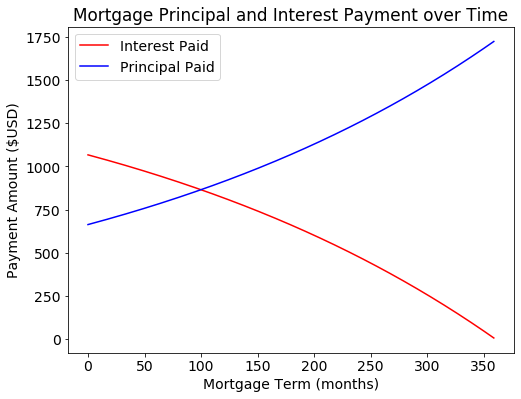

In [15]:
# plot interest vs principal
plt.rcParams.update({'font.size': 14})
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.xlabel("Mortgage Term (months)")
plt.ylabel("Payment Amount ($USD)")
plt.title("Mortgage Principal and Interest Payment over Time")
plt.legend(["Interest Paid", "Principal Paid"], loc=2)
plt.show()

### Model cumulative equity and interest over time.

In [18]:
down_payment_percent = 0.0
home_value = 450000.0

# calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)

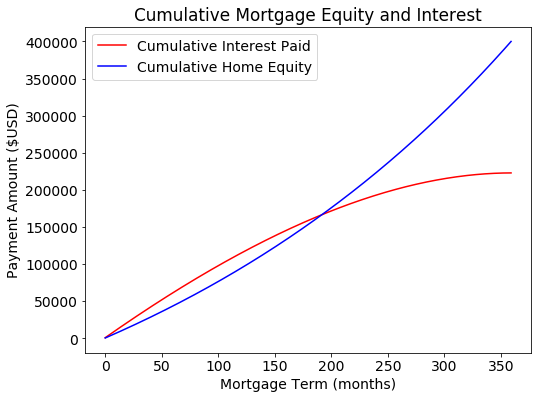

In [17]:
# Plot the cumulative interest paid vs equity accumulated
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.legend(["Cumulative Interest Paid", "Cumulative Home Equity"], loc=2)
plt.xlabel("Mortgage Term (months)")
plt.ylabel("Payment Amount ($USD)")
plt.title("Cumulative Mortgage Equity and Interest")
plt.show()

### Model rising home value and percent value owned.

*NOTE: THIS IS NOT REAL GROWTH DATA. THIS IS AN EXAMPLE.*

In [19]:
# Calculate the cumulative growth over time

# Fix values in arrays --> sci note to float :.2f

monthly_growth_percent = 0.0025
growth_array = np.full([mortgage_term],monthly_growth_percent)

cumulative_growth_forecast = np.cumprod(1+growth_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast*cumulative_percent_owned

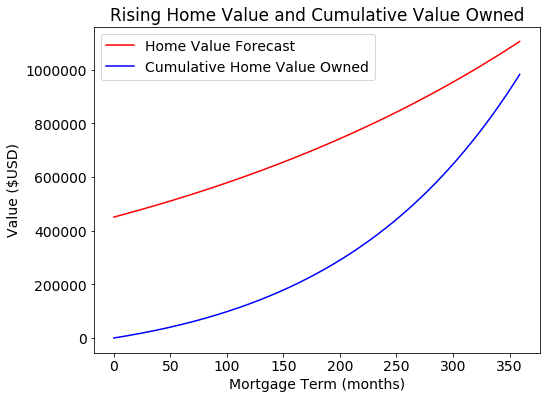

In [20]:
# Plot the home value vs equity accumulated
# rescale arrays to fix plot
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
plt.legend(["Home Value Forecast", "Cumulative Home Value Owned"], loc=2)
plt.xlabel("Mortgage Term (months)")
plt.ylabel("Value ($USD)")
plt.title("Rising Home Value and Cumulative Value Owned")
plt.show()

### Model falling home value and underwater mortgage periods.

***NOTE: THIS IS NOT REAL DECLINE DATA. THIS IS AN EXAMPLE.***

In [21]:
import pandas as pd

# Fix values in arrays --> sci note to float :.2f

# Cumulative drop in home value over time as a ratio
decline_array = np.full([mortgage_term], -0.0045)
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = home_value_forecast < principal_remaining
pd.value_counts(underwater)

True     233
False    127
dtype: int64

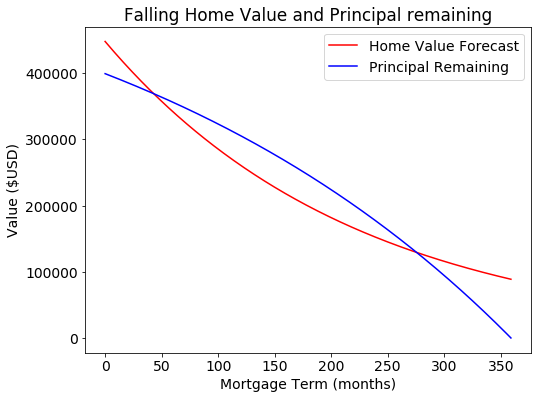

In [22]:
# Plot the home value vs principal remaining
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(["Home Value Forecast", "Principal Remaining"], loc=1)
plt.xlabel("Mortgage Term (months)")
plt.ylabel("Value ($USD)")
plt.title("Falling Home Value and Principal remaining")
plt.show()